In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


from myNnet.net import train, run_test, evaluate_classifn
from myNnet.layer import Dense, Dropout
from myNnet.activations import Tanh, Softmax, Sigmoid, ReLU, SoftPlus
from myNnet.losses import mse, mse_prime, categorical_crossentropy, categorical_crossentropy_prime
from myNnet.datautils import my_train_test_split, encode_categories

In [2]:
iris_data = pd.read_csv('./data/iris.csv')

In [3]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
from myNnet.net import encode_categories

all_species = np.unique(iris_data['species'])
encoded_species = encode_categories(iris_data['species'], all_species)
encoded_species_df = pd.DataFrame(encoded_species, columns=all_species)


iris_df = pd.concat([iris_data, encoded_species_df], axis=1)
iris_df.drop('species', axis=1, inplace=True)


#### Splitting


In [5]:
x_train, y_train, x_test, y_test = my_train_test_split(df=iris_df, y_columns=['setosa', 'versicolor', 'virginica'], random_state=2, test_size=0.25)


In [6]:
x_train.shape

(112, 4, 1)

#### Network creation

In [7]:
iris_network = [
    Dense(4, 2),
    Tanh(),
    Dropout(2, 0.3),
    Dense(2, 3),
    Softmax(3, 3)
]

print(iris_network[0].weis.shape)

(2, 4)


#### Training 

In [8]:
err_history = train(network=iris_network, X_train=x_train, Y_train=y_train, loss=mse, loss_grad=mse_prime, shuffle=True, epochs=500, alpha=0.011)


error for epoch  1 =  0.4266948609888755
error for epoch  2 =  0.42632388080553935
error for epoch  3 =  0.4259160195795952
error for epoch  4 =  0.42546551162438934
error for epoch  5 =  0.4249653254658147
error for epoch  6 =  0.42440679508908463
error for epoch  7 =  0.42377911262812634
error for epoch  8 =  0.42306861592461426
error for epoch  9 =  0.42225776309370094
error for epoch  10 =  0.42132361100568755
error for epoch  11 =  0.4202354671073881
error for epoch  12 =  0.4189510646287281
error for epoch  13 =  0.41740981740147687
error for epoch  14 =  0.415519313778579
error for epoch  15 =  0.41312160163387646
error for epoch  16 =  0.4098649291379588
error for epoch  17 =  0.40366164683563116
error for epoch  18 =  0.23584658081782733
error for epoch  19 =  0.1767100874966316
error for epoch  20 =  0.17295876771038743
error for epoch  21 =  0.17032259751003315
error for epoch  22 =  0.16834056188959443
error for epoch  23 =  0.16681950443648727
error for epoch  24 =  0.1656

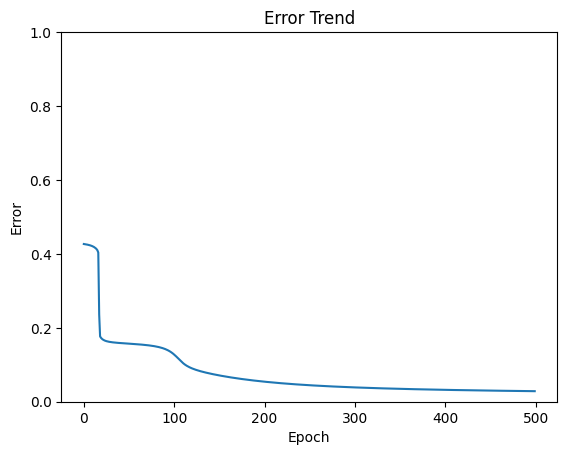

In [9]:
plt.plot(err_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.ylim(0, 1)
plt.title('Error Trend')
plt.show()

#### Testing

In [10]:

y_pred = run_test(iris_network, x_test)

139741202149728 139741202144160


In [11]:
evaluate_classifn(y_test, y_pred)

Network accuracy ☢️ 0.8947368421052632
